In [2]:
from nilearn import image
from nilearn import regions
from nilearn import plotting
from nilearn import input_data
import nibabel as nib
import pandas as pd
import numpy as np
from nilearn import masking

/home/gani/.local/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
import matplotlib

In [4]:
path_to_img = "/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/sub-control032029_T1w_N4.nii.gz"
path_to_brain_mask = "/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/sub-control032029_T1w_mask.nii.gz"
path_to_mask = "/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/prob_MALPEM/posteriors_27.nii.gz"
path_to_masked_img = "/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/sub-control032029_T1w_N4_overlaid.nii.gz"

In [5]:
# img = plotting.plot_anat(path_to_img)
mask = nib.load(path_to_brain_mask)
img = nib.load(path_to_img)
mask_region = nib.load(path_to_mask)
header = mask.header

# display = plotting.plot_anat(mask, cut_coords=(49,87,112), display_mode = "ortho")
# display.add_overlay(path_to_mask, cmap=plotting.cm.purple_green)

In [6]:
mask_array = mask_region.get_fdata()

In [7]:
mask_array.shape

(166, 218, 205, 1)

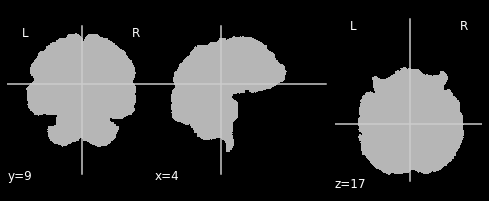

In [8]:
plotting.plot_anat(mask)

In [9]:
mask_array2 = mask_array.copy()
mask_array2[mask_array2 >= 0.8] = 1
mask_array2[mask_array2 < 0.8] = 0

In [10]:
len(mask_array[mask_array2 == 1]), len(mask_array[mask_array >= 0.8])

(2103, 2103)

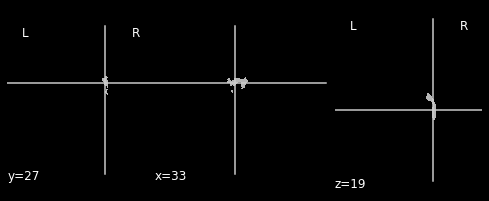

In [11]:
new_mask = image.new_img_like(mask, mask_array2, mask.affine)
plotting.plot_anat(new_mask, cut_coords=(33,27,19))

In [12]:
mask_array_tuples = np.array(np.nonzero(mask_array2 == 1))

In [13]:
mask_array_tuples.shape

(4, 2103)

In [14]:
tuples = []
for i in range(0,mask_array_tuples.shape[1]):
    tup = mask_array_tuples[:,i]
    tup = [tup[0], tup[1], tup[2]]
    tuples.append(tup)

In [15]:
tuples2 = np.array(tuples)
tuples2[0,:]

array([ 49,  85, 112])

In [16]:
tuples2.shape

(2103, 3)

In [17]:
import scipy

descriptive = scipy.stats.describe(tuples2, axis=0)
descriptive.minmax

(array([ 49,  80, 111]), array([ 67, 117, 134]))

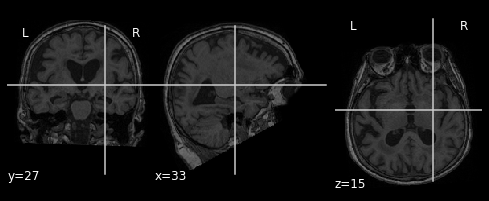

In [18]:
plotting.plot_anat(img, cut_coords=(33,27,15.9))

In [19]:
pixel_vals = img.get_fdata()
pixel_vals.shape

(166, 218, 205)

In [20]:
pixel_vals[tuples[1]]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [21]:
pixel_list = []
print(tuples[1])
for i in tuples[1:2]:
    print(i)
    x, y, z = i[0], i[1], i[2]
    min_x, max_x, min_y, max_y, min_z, max_z = x-32, x+32, y-32, y+32, z-32, z+32
    pixel_array_z_mask = pixel_vals[min_x:max_x,min_y:max_y,z]
    pixel_array_x_mask = pixel_vals[x, min_y:max_y, min_z:max_z]
    pixel_array_y_mask = pixel_vals[min_x:max_x, y, min_z:max_z]
    pixel_list.append(pixel_array_x_mask)



[49, 86, 112]
[49, 86, 112]


In [22]:
matplotlib.pyplot.imsave("dummypic_mask_x.png",pixel_array_x_mask, format="png",cmap='gray')
matplotlib.pyplot.imsave("dummypic_mask_y.png",pixel_array_y_mask, format="png",cmap='gray')
matplotlib.pyplot.imsave("dummypic_mask_z.png",pixel_array_z_mask, format="png",cmap='gray')

In [23]:
max_val = pixel_array_x_mask.max()
pixel_array_x2 = pixel_array_x_mask / max_val
pixel_array_x2

array([[0.60120723, 0.63592864, 0.68869341, ..., 0.72339517, 0.74157371,
        0.72305285],
       [0.62221026, 0.56832527, 0.69521748, ..., 0.81623757, 0.78666543,
        0.74062504],
       [0.5314547 , 0.44700123, 0.58058455, ..., 0.78249884, 0.73461761,
        0.76370051],
       ...,
       [0.22824171, 0.55193379, 0.54382002, ..., 0.70633778, 0.75259558,
        0.74798129],
       [0.21326045, 0.61483212, 0.56800769, ..., 0.71581573, 0.7412798 ,
        0.75548816],
       [0.27148385, 0.47048341, 0.51863806, ..., 0.71394586, 0.79030696,
        0.80442653]])

In [24]:
from PIL import Image as im

data = im.fromarray(pixel_array_x2, 'L')
data.save("dummypic.png")

In [25]:
mask_reshaped = np.reshape(mask_array, (166,218,205))
mask_reshaped.shape

(166, 218, 205)

In [26]:
pixel_list = []
print(tuples[20])
for i in tuples[20:21]:
    x, y, z = i[0], i[1], i[2]
    min_x, max_x, min_y, max_y, min_z, max_z = x-32, x+32, y-32, y+32, z-32, z+32
    pixel_array_z_mask = mask_reshaped[min_x:max_x,min_y:max_y,z]
    pixel_array_x_mask = mask_reshaped[x, min_y:max_y, min_z:max_z]
    pixel_array_y_mask = mask_reshaped[min_x:max_x, y, min_z:max_z]
    pixel_list.append(pixel_array_x_mask)



[50, 89, 113]


In [27]:
print(pixel_array_x_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
matplotlib.pyplot.imsave("dummypic_mask_x.png",pixel_array_x_mask, format="png",cmap='gray')
matplotlib.pyplot.imsave("dummypic_mask_y.png",pixel_array_y_mask, format="png",cmap='gray')
matplotlib.pyplot.imsave("dummypic_mask_z.png",pixel_array_z_mask, format="png",cmap='gray')

In [29]:
import random
import math

In [30]:
len(tuples)

2103

In [31]:
tuples[2102]

[67, 111, 120]

In [34]:
rand_tuples = random.sample(range(0,len(tuples)), 500)
# print(rand_tuples)
chosen_tuples = []
generate_bad_tuples = []


for i in rand_tuples[1:]:
    new_tuple = tuples[i]
    print(new_tuple)
    if new_tuple in generate_bad_tuples:
        print("continue")
        continue
    x = new_tuple[0]
    y = new_tuple[1]
    z = new_tuple[2]
    for a,b,c in zip(range(x-2,x+2),range(y-2,y+2),range(z-2,z+2)):
        generate_bad_tuples.append([a,b,c])
    
    chosen_tuples.append(new_tuple)
    if len(chosen_tuples) >= 150:
        print("breaking")
        break

len(chosen_tuples)


[58, 112, 125]
[51, 95, 125]
[59, 106, 120]
[56, 108, 130]
[52, 103, 129]
[57, 97, 130]
[52, 85, 128]
[51, 100, 120]
[58, 108, 120]
[55, 97, 130]
[53, 91, 125]
[53, 93, 130]
[50, 87, 112]
[52, 96, 127]
[63, 113, 120]
[52, 85, 117]
[54, 109, 132]
[63, 110, 123]
[51, 92, 127]
[55, 109, 122]
[53, 104, 124]
[50, 97, 120]
[61, 108, 120]
[52, 86, 118]
[57, 110, 126]
[55, 88, 128]
[53, 100, 130]
[51, 92, 123]
[60, 110, 124]
[53, 105, 131]
[56, 108, 120]
[56, 98, 128]
[53, 86, 128]
[52, 87, 128]
[56, 109, 128]
[52, 100, 126]
[66, 111, 121]
[53, 90, 122]
[53, 103, 124]
[59, 108, 127]
[52, 103, 121]
[54, 88, 130]
[62, 110, 123]
[51, 98, 118]
[55, 108, 123]
[56, 107, 121]
[55, 109, 124]
[54, 108, 130]
[54, 104, 121]
[52, 90, 126]
[59, 107, 127]
[55, 84, 126]
[54, 111, 126]
[54, 107, 121]
[53, 87, 116]
[52, 83, 125]
[56, 109, 126]
[53, 88, 122]
[50, 94, 122]
[51, 87, 113]
[51, 101, 124]
[54, 86, 127]
[54, 89, 128]
[53, 106, 124]
[54, 104, 123]
[54, 107, 122]
continue
[63, 114, 121]
[52, 92, 124]
[

150

In [13]:
masker = input_data.NiftiMasker(mask_img = new_mask)
masker = masker.fit()
# plotting.plot_anat(img_masked, cut_coords = (33,27,19))

NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f499c04b880>)

In [18]:
the_mask = masking.apply_mask(img, new_mask)
the_mask.shape

(1358858,)

In [200]:
masker = input_data.NiftiMasker()
masker.fit(new_mask)
img_masked = masker.transform_single_imgs(img_masked)
plotting.plot_anat(img_masked, cut_coords = (33,27,19))

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
330.19345

In [156]:
masker = input_data.NiftiMasker(mask_img=mask, standardize=True)
img_masked = masker.fit_transform(img)
plotting.plot_anat(img_masked, cut_coords = (33,27,19))

ValueError: Given mask is not made of 2 values: [0.         0.00128519 0.00130086 ... 0.99999998 0.99999999 1.        ]. Cannot interpret as true or false

In [152]:
mask.get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [146]:
mask.affine, mask.shape

(array([[-9.97770548e-01, -5.95000423e-02,  2.65954956e-02,
          8.92184753e+01],
        [-6.09053597e-02,  9.74748194e-01,  1.62348233e-03,
         -6.25100098e+01],
        [ 2.72844806e-02, -5.47278205e-08,  9.76198912e-01,
         -1.04667480e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 (166, 218, 205))

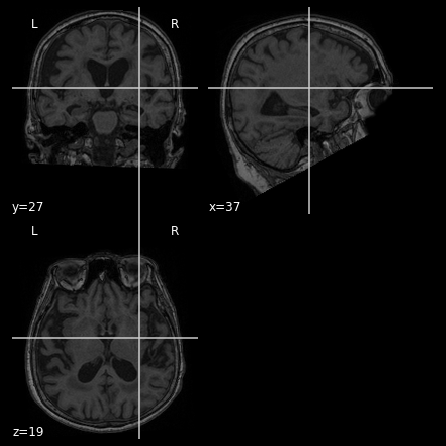

In [150]:
target_affine = np.diag((1,1,1))
img2 = image.resample_img(mask, target_affine=target_affine)
plotting.plot_anat(img2, cut_coords=(37,27,19), display_mode='tiled')

In [ ]:
plotting.find_cut_slices(mask,direction='z')

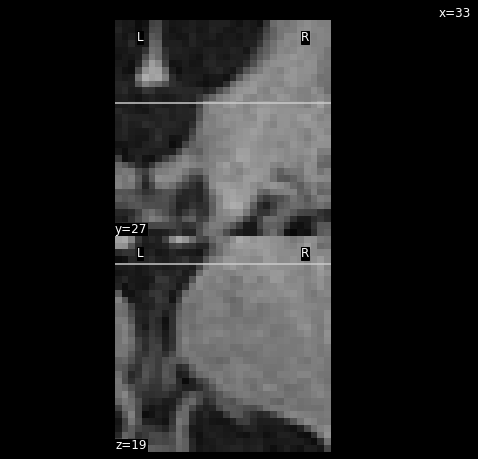

In [147]:

target_affine = np.diag((1,1,1,1))
img2 = image.resample_img(mask, target_affine=np.eye(4), target_shape=(32,32,32))
plotting.plot_anat(img2, cut_coords=(33,27,19),display_mode="tiled")

In [118]:
#image coordinates are provided in voxels

image.coord_transform(36,26,18,mask.affine), image.coord_transform(49,87,112,mask.affine)

## thus, each voxel is 0.97 mm in length. Thus, since they performed 32x32x32 voxel subsampling, their regions were
## about 32mm in length.

((52.23045343905687, -39.32992698275484, -86.11366017894102),
 (38.129910323768854, 19.490550527349114, 6.003732427555292))

In [92]:
header.get_data_shape()

(166, 218, 205, 1)

In [61]:
array_img = mask.get_fdata()
array_img.shape

(166, 218, 205, 1)

In [117]:
np.nonzero(array_img >= 0.9)

(array([49, 49, 49, ..., 66, 67, 67]),
 array([ 87,  88,  89, ..., 112, 110, 111]),
 array([112, 112, 112, ..., 120, 119, 120]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [65]:
img2 = array_img.copy()

In [67]:
img2[img2 != 0] = 1

In [46]:
maskcoords = regions.RegionExtractor(path_to_mask, thresholding_strategy='img_value')
# signal = masker.fit_transform(path_to_img)

ValueError: Given mask is not made of 2 values: [0.         0.00128519 0.00130086 ... 0.99999998 0.99999999 1.        ]. Cannot interpret as true or false

In [45]:
print(dir(maskcoords))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_check_feature_names', '_check_fitted', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'allow_overlap', 'detrend', 'dtype', 'extractor', 'fit', 'fit_transform', 'get_params', 'high_pass', 'high_variance_confounds', 'inverse_transform', 'low_pass', 'maps_img', 'mask_img', 'memory', 'memory_level', 'min_region_size', 'resampling_target', 'set_params', 'smoothing_fwhm', 'standardize', 'standardize_confounds', 't_r', 'threshold', 'thresholding_strategy', 'transform', 'transform_single_imgs', 'verbose']


In [20]:
masked_img

RegionExtractor(maps_img='/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/sub-control032029_T1w_N4.nii.gz',
                mask_img='/mnt/d/Downloads/neurocon/finished_runs/sub-control032029_T1w_02-12-21_02-32-28/prob_MALPEM/posteriors_27.nii.gz',
                verbose=1)

In [25]:
plotting.plot_anat(masked_img)

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
posteriors_27.nii....